In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from statsmodels.tsa.seasonal import seasonal_decompose

In [33]:
# Read the data 
df1 = pd.read_csv("AirPassengers.csv")

In [34]:
df1.dtypes

date     object
value     int64
dtype: object

In [35]:
df1.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [28]:
# # Renaming the 'date' column to 'Year-Month'
# df1.rename(columns={'date': 'Year-Month'}, inplace=True)

In [36]:
# we are providing inputs to pandas that we are trying to work with time series
df1 = pd.read_csv('AirPassengers.csv',parse_dates=['date'])

In [37]:
df1.dtypes

date     datetime64[ns]
value             int64
dtype: object

In [38]:
df1.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [39]:
# it is recommended that we make out time series references as index
df1 = pd.read_csv('AirPassengers.csv',parse_dates=['date'],index_col='date')

In [40]:
df1.head()

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [41]:
df1['1951-04-1':'1952-03-01']

,value
date,
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184
1951-10-01,162
1951-11-01,146
1951-12-01,166


In [42]:
df1.loc['1960-05-01']

value    472
Name: 1960-05-01 00:00:00, dtype: int64

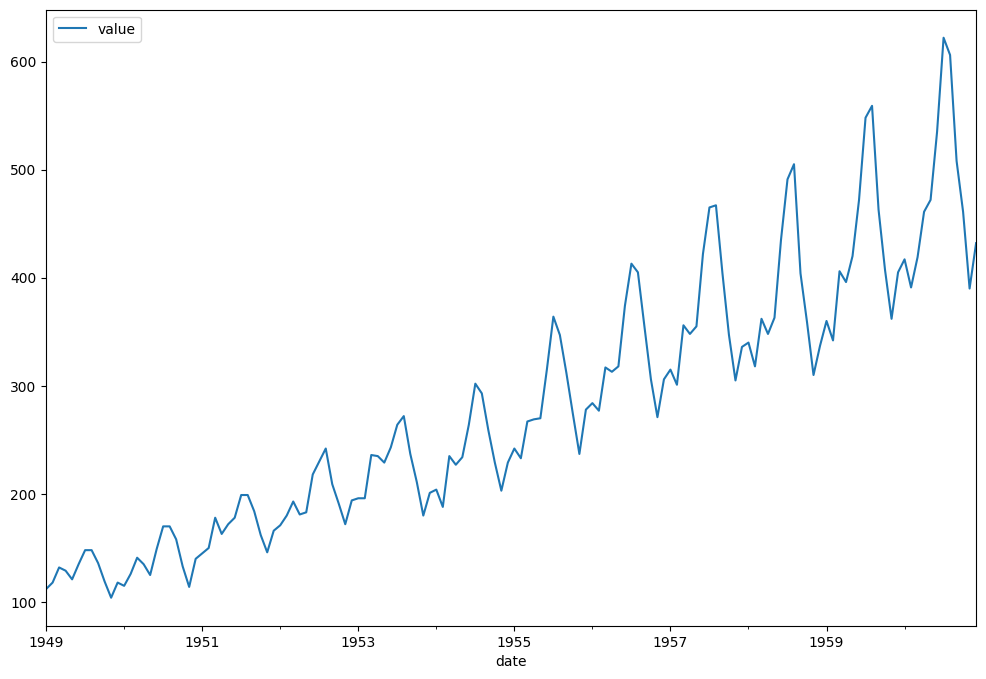

In [43]:
# Plot the time series
df1.plot()
plt.show()

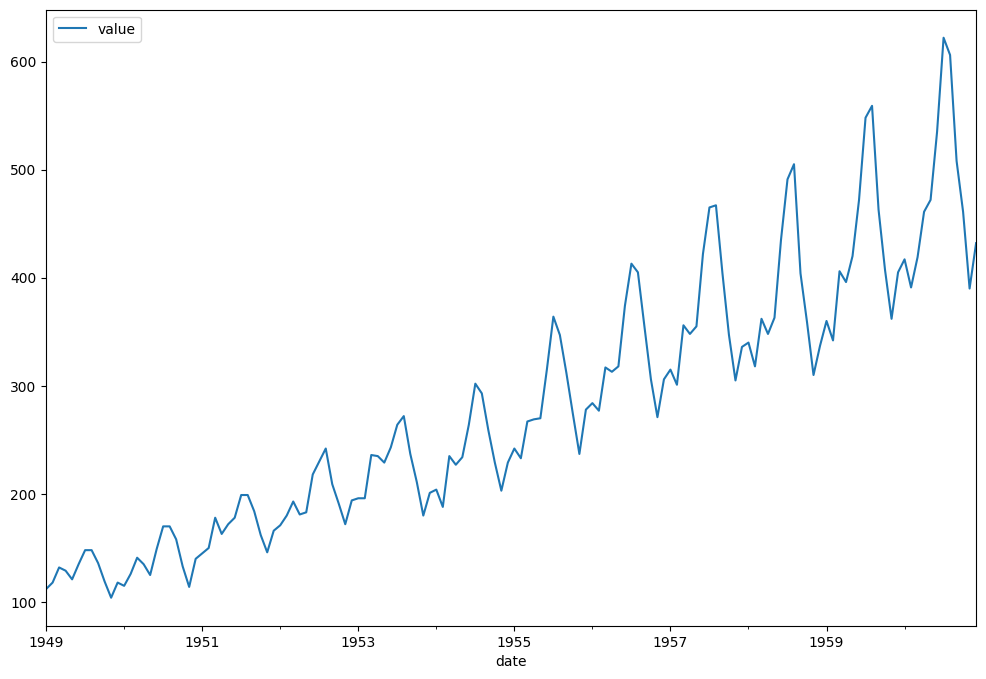

In [44]:
# Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] =12,8
df1.plot()
plt.show()

In [45]:
# Lets try to do log transformation
df1_log = df1.copy()

In [46]:
df1_log['value'] = np.log(df1)

In [47]:
df1_log.value

date
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: value, Length: 144, dtype: float64

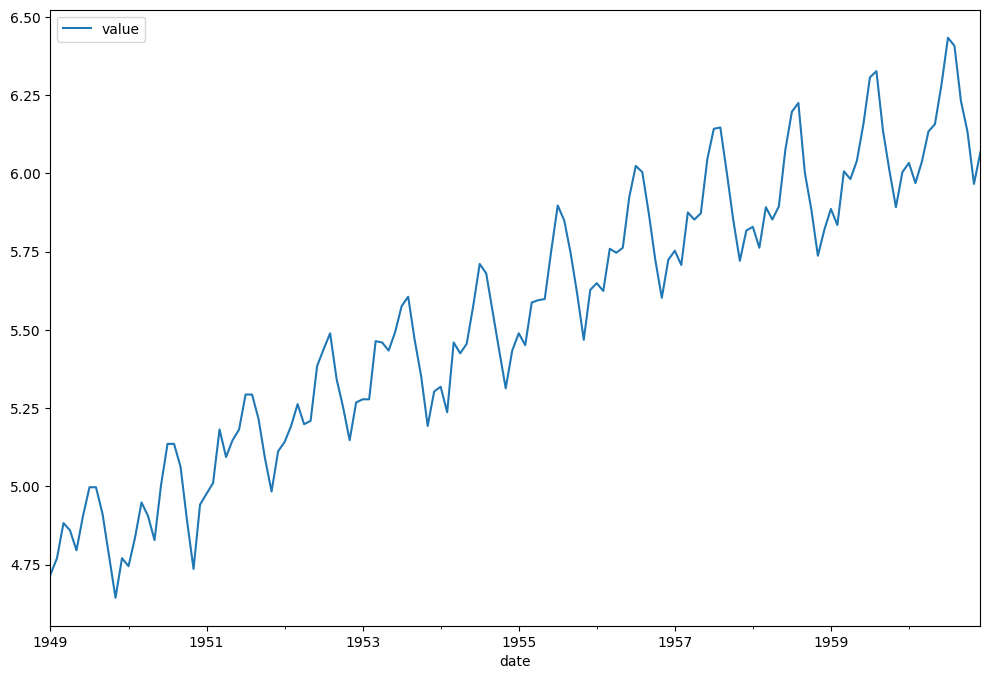

In [48]:
# Visualize the log transformed series
df1_log.plot()
plt.show()
